In [96]:
import requests
import urllib.parse
import pickle


In [97]:
city = "CHARNI ROAD,Mumbai"
address=urllib.parse.quote(city)
country = "India"

In [98]:
url = "https://nominatim.openstreetmap.org/?addressdetails=1&q=" + address + "+" + country +"&format=json&limit=1"

In [99]:
response = requests.get(url).json()
"""
def check(x,y):
    try:
        x=response[0]["lat"]
        y=response[0]["lon"]


    except IndexError:
        print("Address is invalid")

    return x,y

result=""

if check(lat,lon) == "Address is invalid":
    result="Address is invalid"
else:
    lat=check(lat,lon)[0]
    lon=check(lat,lon)[1]
    result=f"Map cordinate:-{lat},{lon}"
    print(result)


"""
lat=response[0]["lat"]
lon=response[0]["lon"]


In [100]:
ln=600
bd=300

In [101]:
def maptype(map):
    ln=600
    bd=300
    ratio=f"{bd}x{ln}"
    zoom="17"
    access_token="pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q"

    api=f"https://api.mapbox.com/styles/v1/mapbox/{map}/static/{lon},{lat},{zoom}/{ratio}?access_token={access_token}"
    return api[0:]



#response = requests.get(maptype("satellite-v9"))
#print(response.url)


In [102]:
# Querying a style with raster layers returns a JPEG
# and save the output as a JPEG image
# Retrieve a map at 72.873722 longitude, 19.211453 latitude, zoom 10.
# Bearing and pitch default to 0
# and save the output as a PNG image.


In [103]:

sample = requests.get(maptype("satellite-v9"))
print(f"Sample Status {sample.status_code}")

dark = requests.get(maptype("dark-v10"))
print(f"Dark Status {dark.status_code}")
light = requests.get(maptype("light-v10"))
print(f"Light Status {light.status_code}")
street = requests.get(maptype("streets-v11"))
print(f"Street Status {street.status_code}")
satellite = requests.get(maptype("satellite-v9"))
print(f"Satellite Status {satellite.status_code}")
street_old = requests.get(maptype("streets-v9"))
print(f"Street Status {street_old.status_code}")
satellite_new = requests.get(maptype("satellite-streets-v9"))
print(f"Satellite_new Status {satellite_new.status_code}")

Sample Status 200
Dark Status 200
Light Status 200
Street Status 200
Satellite Status 200
Street Status 200
Satellite_new Status 200


In [104]:
def file_name(name,file_t):
    file_t = f"/home/karan/Remote-vegetation-sensing/data/{file_t}.tiff"
    file = open(file_t[0:], "wb")
    file.write(name.content)
    file.close()
     

file_name(sample,"sample")
file_name(dark,"dark")
file_name(light,"light")
file_name(street,"street")
file_name(street_old,"street_old")
file_name(satellite,"satellite")
file_name(satellite_new,"satellite_new")





In [105]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image
#import xarray as xr
#import rioxarray as rxr

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go
import cv2
from PIL import Image

np.seterr(divide='ignore', invalid='ignore')


{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [106]:
%pwd
%ls

 LICENSE        books_read.tiff   project/                  test324.png
 Opencv.ipynb   data/             requirements.txt          test_opencv.py
 README.md      foo.png          'test application.ipynb'
 app.py         module/           test.png


In [107]:
print('Check files ?:')
for name in glob('/home/karan/Remote-vegetation-sensing/data/*.tiff'):
    print(name)

Check files ?:
/home/karan/Remote-vegetation-sensing/data/dark.tiff
/home/karan/Remote-vegetation-sensing/data/satellite_new.tiff
/home/karan/Remote-vegetation-sensing/data/street_old.tiff
/home/karan/Remote-vegetation-sensing/data/street.tiff
/home/karan/Remote-vegetation-sensing/data/satellite.tiff
/home/karan/Remote-vegetation-sensing/data/sample.tiff
/home/karan/Remote-vegetation-sensing/data/light.tiff


In [108]:
S_sentinel_bands = glob(r"/home/karan/Remote-vegetation-sensing/data/*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands


['/home/karan/Remote-vegetation-sensing/data/dark.tiff',
 '/home/karan/Remote-vegetation-sensing/data/light.tiff',
 '/home/karan/Remote-vegetation-sensing/data/sample.tiff',
 '/home/karan/Remote-vegetation-sensing/data/satellite.tiff',
 '/home/karan/Remote-vegetation-sensing/data/satellite_new.tiff',
 '/home/karan/Remote-vegetation-sensing/data/street.tiff',
 '/home/karan/Remote-vegetation-sensing/data/street_old.tiff']

In [109]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

/home/karan/.local/lib/python3.8/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning:

Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.



In [110]:
arr_st = np.stack(l)

In [111]:
type(arr_st)

numpy.ndarray

In [112]:
arr_st.shape

(7, 600, 300)

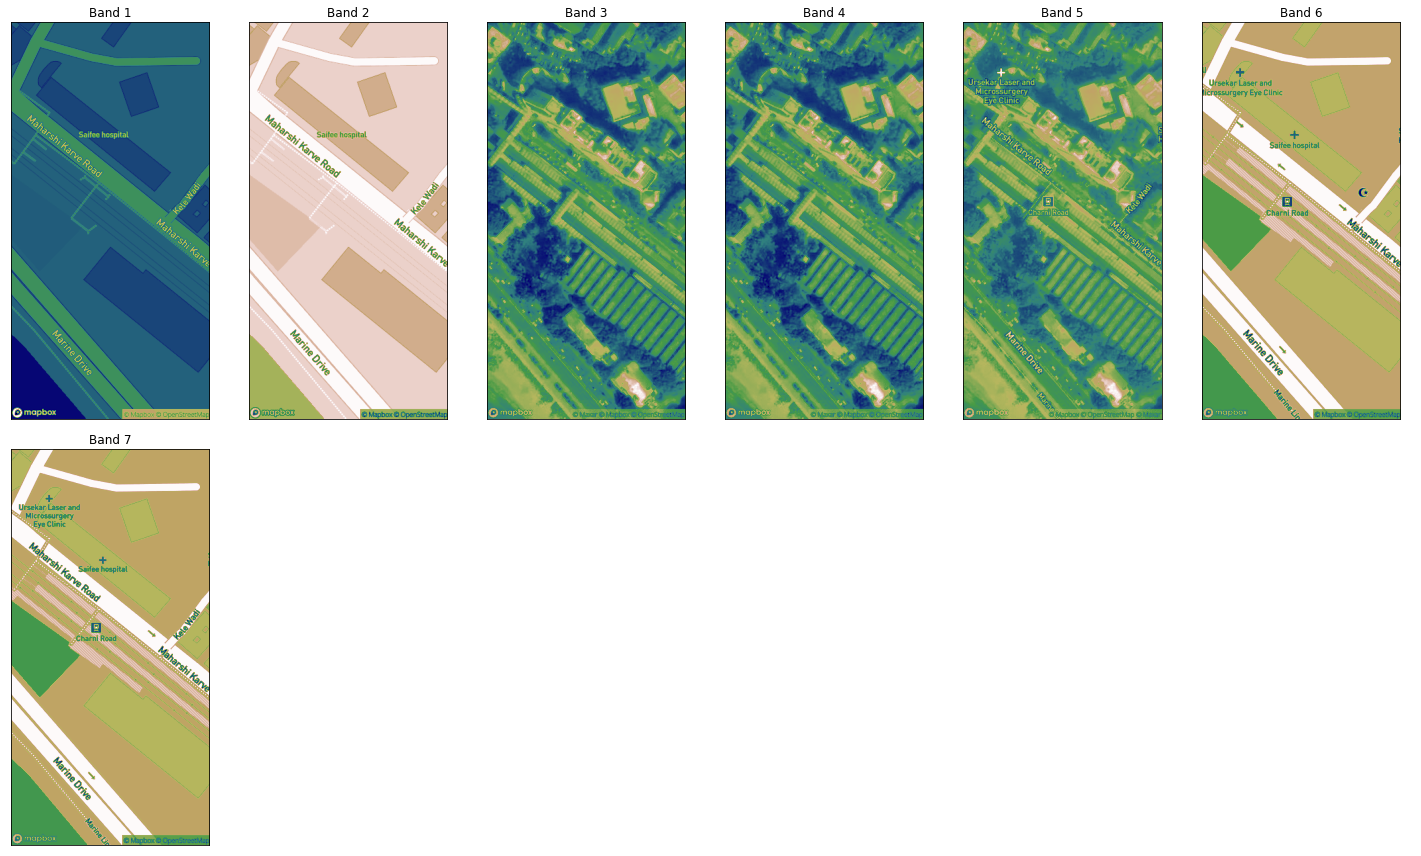

In [113]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

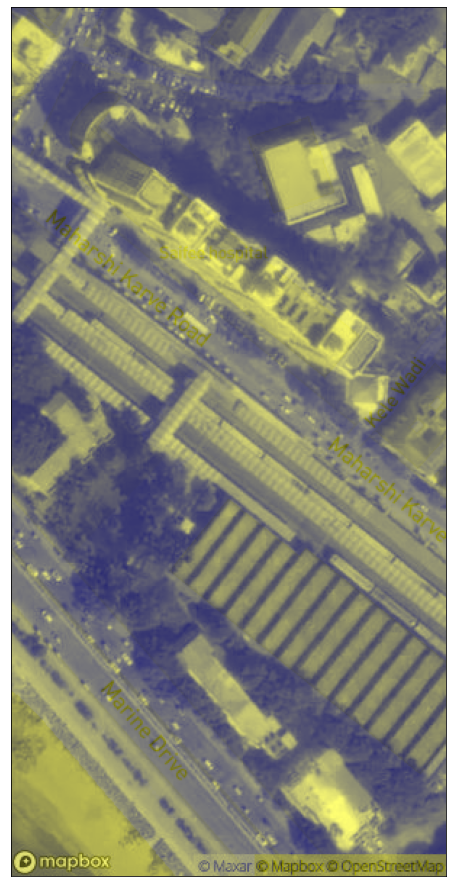

In [114]:
rgb = ep.plot_rgb(arr_st, 
                  rgb=(3,2,1), 
                  figsize=(10, 16), 
                  # title='RGB Composite Image'
                  )

plt.show()

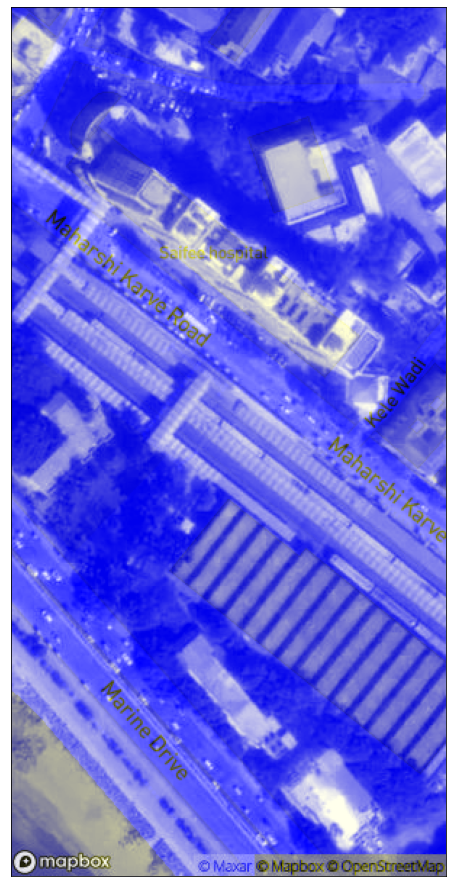

In [115]:
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(10, 16),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

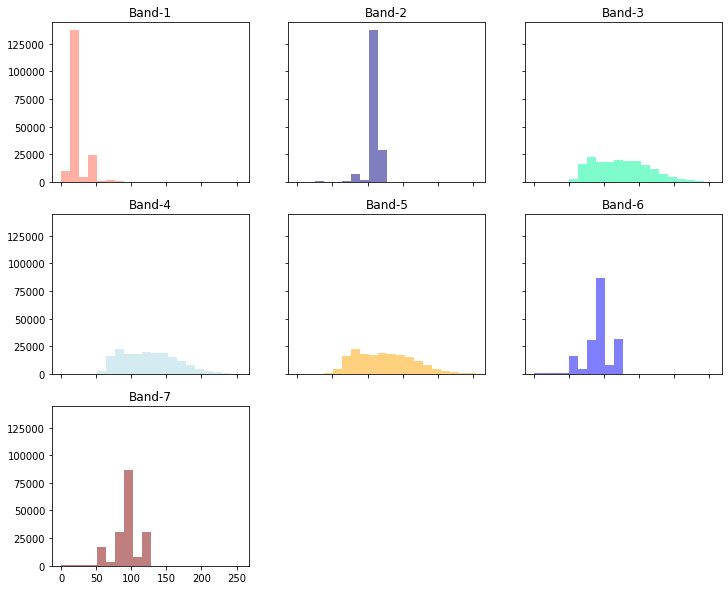

In [116]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon']

ep.hist(arr_st, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 8)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

In [117]:
# Preprocessing 

In [118]:
x = np.moveaxis(arr_st, 0, -1)
x.shape
ln

600

In [119]:
x.reshape(-1, 7).shape, ln*bd

((180000, 7), 180000)

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_data = x.reshape(-1, 7)

scaler = StandardScaler().fit(X_data)

X_scaled = scaler.transform(X_data)

X_scaled.shape

(180000, 7)

In [121]:
## Principal Component Analysis (PCA)

In [122]:
pca = PCA(n_components = 7)

pca.fit(X_scaled)

data = pca.transform(X_scaled)

In [123]:
data.shape

(180000, 7)

In [124]:
pca.explained_variance_ratio_.cumsum()

array([0.43914341, 0.77902875, 0.92006009, 0.96106833, 0.98770496,
       1.        , 1.        ])

In [125]:
np.sum(pca.explained_variance_ratio_)

1.0

In [126]:
## Visualize Bands after PCA

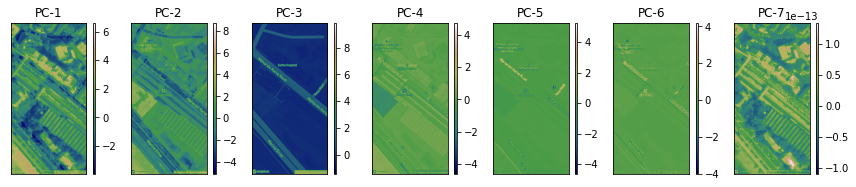

In [127]:
ep.plot_bands(np.moveaxis(data.reshape((ln, bd, data.shape[1])), -1, 0),
              cmap = 'gist_earth',
              cols = 7,
              title = [f'PC-{i}' for i in range(1,8)])

plt.show()

In [128]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 99)
kmeans.fit(data)

KMeans(n_clusters=5, random_state=99)

In [129]:
labels = kmeans.predict(data)

In [130]:
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int32)

In [131]:
## Visualize Clusters

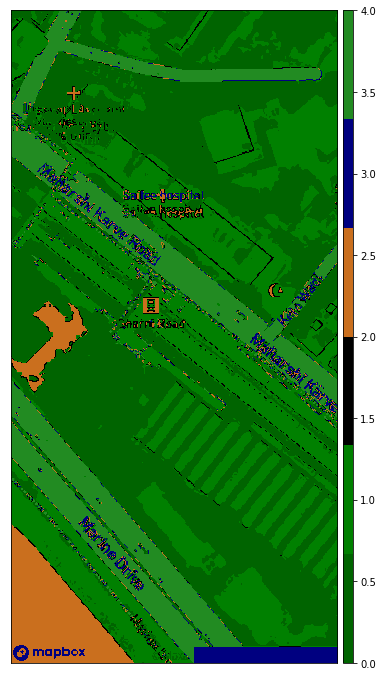

In [132]:
k=ep.plot_bands(labels.reshape(600, 300), cmap=ListedColormap(['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen']))
plt.show()

In [133]:
import plotly.express as px

fig = px.imshow(labels.reshape(600, 300), 
          color_continuous_scale = ['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen'])

fig.update_xaxes(showticklabels=False)

fig.update_yaxes(showticklabels=False)

fig=fig.update_layout(
    autosize=False,
    width=500,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)
type(fig)

plotly.graph_objs._figure.Figure

In [134]:
fig.show()

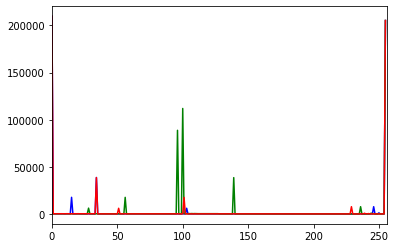

In [140]:
fig.write_image("test324.png")
img = cv2.imread('test324.png')
# Calculate histogram without mask
# grab the image channels, initialize the tuple of colors,
# the figure and the flattened feature vector


color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.savefig("foo.png")
plt.show()


In [56]:
"""l=ep.plot_bands(labels.reshape(600, 300), cmap='RdYlGn')
plt.show()"""

"l=ep.plot_bands(labels.reshape(600, 300), cmap='RdYlGn')\nplt.show()"

In [57]:
#ep.plot_bands(labels.reshape(600, 300), cmap=ListedColormap(['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen','olive','red','lime','grey']))
#plt.show()

In [66]:
"""
import plotly.express as px

fig = px.imshow(labels.reshape(600, 300), 
          color_continuous_scale = "RdYlGn")

fig.update_xaxes(showticklabels=False)

fig.update_yaxes(showticklabels=False)

kk=fig.update_layout(
    autosize=False,
    width=500,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)
"""

'\nimport plotly.express as px\n\nfig = px.imshow(labels.reshape(600, 300), \n          color_continuous_scale = "RdYlGn")\n\nfig.update_xaxes(showticklabels=False)\n\nfig.update_yaxes(showticklabels=False)\n\nkk=fig.update_layout(\n    autosize=False,\n    width=500,\n    height=1000,\n    margin=dict(\n        l=50,\n        r=50,\n        b=100,\n        t=100,\n        pad=4\n    ),\n    # paper_bgcolor="LightSteelBlue",\n)\n'

In [67]:
type(i)

list

In [68]:
## Normalized Difference Vegetation Index (NDVI)
'''
NDVI = ((NIR - Red)/(NIR + Red))
'''

# NIR = pixel values from the near-infrared band
# Red = pixel values from the red band

'\nNDVI = ((NIR - Red)/(NIR + Red))\n'

/home/karan/.local/lib/python3.8/site-packages/earthpy/spatial.py:109: Warning:

Divide by zero produced infinity values that will be replaced with nan values



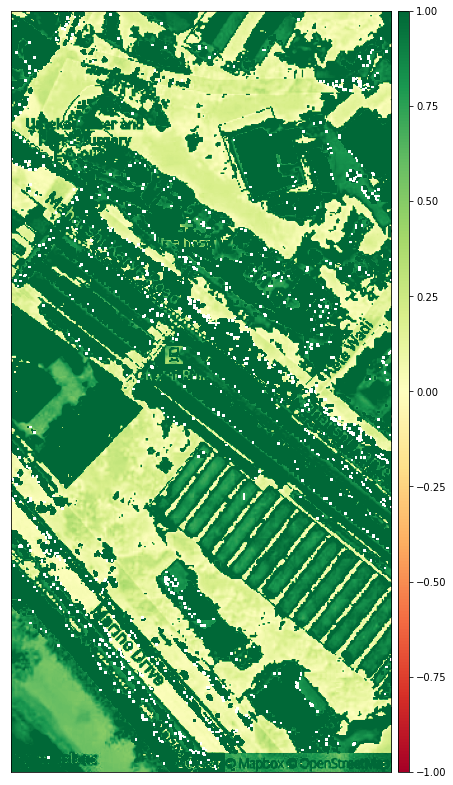

<Figure size 432x288 with 0 Axes>

In [69]:
ndvi = es.normalized_diff(arr_st[6], arr_st[3])

ndvi_image=ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.savefig('books_read.tiff')


In [73]:
type(ndvi_image)


"ndvi_image.figure.savefig('test.png')"


matplotlib.axes._subplots.AxesSubplot

In [ ]:
ndvi = es.normalized_diff(arr_st[6], arr_st[3])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

In [ ]:
## Soil-Adjusted Vegetation Index (SAVI) 


In [ ]:
L = 0.5

savi = ((arr_st[6] - arr_st[3]) / (arr_st[6] + arr_st[3] + L)) * (1 + L)

In [ ]:
ep.plot_bands(savi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
  
img = cv2.imread('/home/karan/Remote-vegetation-sensing/project/data/sample.tiff')

# Calculate histogram without mask
hist1 = cv2.calcHist([img],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img],[1],None,[256],[0,256])
hist3 = cv2.calcHist([img],[2],None,[256],[0,256])

plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.plot(hist1), plt.plot(hist2),plt.plot(hist3)
plt.xlim([0,256])

plt.show()

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

In [ ]:
l=get_image('/home/karan/Remote-vegetation-sensing/project/data/sample.tiff')

In [ ]:
   
    modified_image = cv2.resize(l, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = 10)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    if (True):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        
    print(hex_colors)
